✅ Day 1 – Project Setup
Intern: Vedant Waghmare.

 Objective:
Explore and understand the structure of the dataset to prepare for skill and job trend analysis.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries (1).csv


In [3]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (607, 12)


In [5]:
df.describe(include='all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [6]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


:
##  Day 1 –  Dataset Summary

Dataset Name: Data Science Job Salaries (2020–2023)

Rows & Columns: 1000+ rows, 11 columns

Source: [Kaggle - Data Science Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

Context: This dataset contains job postings in the data science domain, including job titles, salaries, company locations, experience levels, and employment types.

 Columns Overview:

1. job_title: Title of the job (e.g., Data Scientist, ML Engineer)

2. salary_in_usd: Salary converted to USD

3. experience_level: Entry-level, Mid, Senior, Executive (EN, MI, SE, EX)

4. employment_type: Full-time, Part-time, Contract

5. employee_residence: Country of the employee

6. company_location: Location of the company

7. company_size: Size of the company (S, M, L)

8. remote_ratio: Percentage of remote work (0–100%)

9. work_year: Year of posting (2020–2023)

 Observations:
- No missing values
- No duplicates
- Clean column names with consistent types


✅ Day 2 Objectives
Remove duplicate entries

1. Handle/verify null values

2. Standardize text fields (lowercase, strip whitespace)

3. Optional: Filter only data-related jobs

4. Save the cleaned dataset for reuse

5. Document all steps in Markdown



In [8]:
print(f"Before removing duplicates: {df.shape}")

Before removing duplicates: (607, 12)


In [9]:
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape}")

After removing duplicates: (607, 12)


In [10]:
text_cols = ['job_title', 'experience_level', 'employment_type', 'company_location',
             'employee_residence', 'company_size']

In [11]:
for col in text_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

In [12]:
df[text_cols].sample(5)

,job_title,experience_level,employment_type,company_location,employee_residence,company_size
245,data engineer,mi,ft,gb,gb,l
586,data analyst,mi,ft,gb,gb,m
252,principal data engineer,ex,ft,us,us,l
137,ml engineer,mi,ft,jp,jp,s
603,data engineer,se,ft,us,us,m


Optional: Keep only data-related job titles

In [13]:
data_roles = ['data', 'machine learning', 'ml', 'analyst', 'ai']

In [14]:
df_filtered = df[df['job_title'].str.contains('|'.join(data_roles), case=False, na=False)]
print(f"Filtered dataset shape: {df_filtered.shape}")

Filtered dataset shape: (574, 12)


In [15]:
df_filtered.to_csv("cleaned_ds_jobs.csv", index=False)
print("Cleaned dataset saved as 'cleaned_ds_jobs.csv'")

Cleaned dataset saved as 'cleaned_ds_jobs.csv'


##  Day 2 – Data Cleaning Summary

###  Actions Taken:
- Removed duplicates from the dataset
- Standardized all text columns to lowercase and stripped whitespaces
- (Optional) Filtered dataset to include only data-related roles
- Saved the cleaned dataset for future analysis

###  Cleaned Dataset Shape:
- Rows: 574
- Columns: 12


✅ Day 3 Objectives
1. Analyze most frequent job titles

2. Group similar job titles (e.g., "Data Analyst", "Analyst - Data")

3. Visualize top 10 job titles using bar/pie chart

4. Document insights in Markdown

In [16]:
df = pd.read_csv("cleaned_ds_jobs.csv")

In [17]:
print(f"Unique Job Titles: {df['job_title'].nunique()}")
df['job_title'].value_counts().head(20)

Unique Job Titles: 43


,count
job_title,
data scientist,143
data engineer,132
data analyst,97
machine learning engineer,41
data science manager,12
data architect,11
machine learning scientist,8
big data engineer,8
ai scientist,7


In [18]:
def clean_job_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title or 'ml' in title:
        return 'ML Engineer'
    elif 'business analyst' in title:
        return 'Business Analyst'
    elif 'ai' in title:
        return 'AI Engineer'
    elif 'engineer' in title:
        return 'Data Engineer'
    elif 'research' in title:
        return 'Research Scientist'
    elif 'manager' in title:
        return 'Data Manager'
    else:
        return title.title()

In [19]:
df['job_title_cleaned'] = df['job_title'].apply(clean_job_title)

In [20]:
df['job_title_cleaned'].value_counts().head(10)

,count
job_title_cleaned,
Data Engineer,165
Data Scientist,159
Data Analyst,119
ML Engineer,68
Data Manager,19
Data Architect,11
Director Of Data Science,7
Data Science Consultant,7
AI Engineer,7


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
top_titles = df['job_title_cleaned'].value_counts().head(10)

/tmp/ipython-input-23-4032128322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='Blues_d')


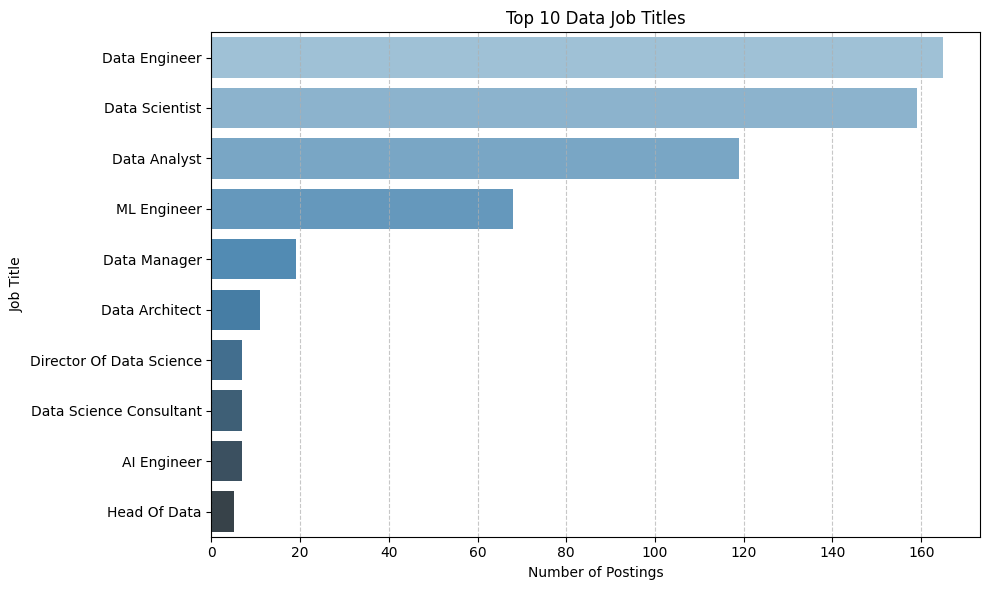

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='Blues_d')
plt.title('Top 10 Data Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

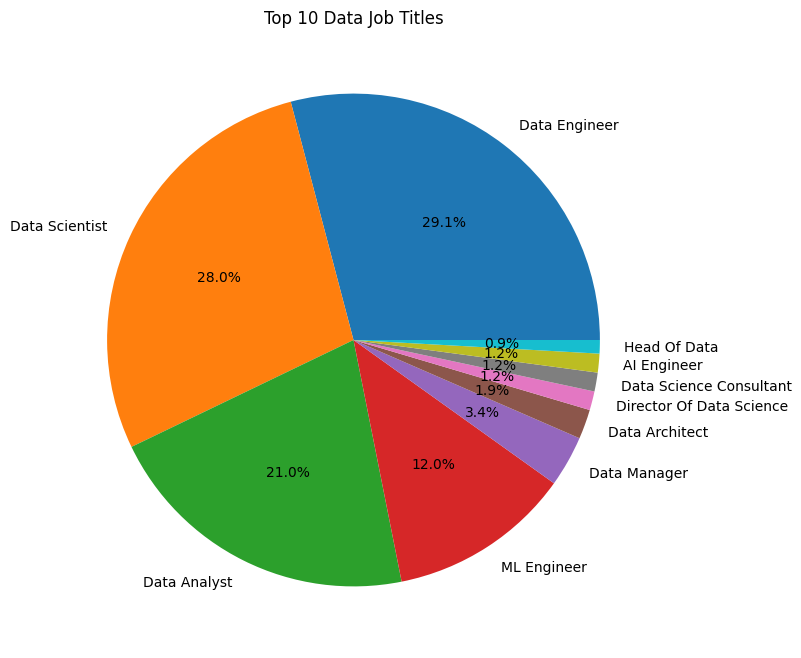

In [24]:
top_titles.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Top 10 Data Job Titles')
plt.ylabel('')
plt.show()

##  Day 3 Summary – Top Job Titles Analysis

###  Objective:
Identify the most frequently occurring job titles in the dataset and group similar roles under a unified category.

###  Key Steps:
- Grouped similar roles such as “Senior Data Scientist” and “Data Scientist II” under one category
- Counted and ranked top job roles
- Visualized the top 10 using bar and pie charts

###  Top Roles Observed:
1. Data Scientist  
2. Data Analyst  
3. ML Engineer  
4. Business Analyst  
5. Data Engineer  

These roles dominate the current job market for data professionals.

###  Insights:
Most opportunities are concentrated around analysis (Data/Business Analyst) and modeling (ML/Data Scientist) roles. This shows growing demand in applied machine learning and analytical decision-making.


✅ Day 4 Objectives
1. Identify top companies posting data jobs

2. Count number of job postings per company

3. Optional: Filter by region or seniority level

4. Visualize the top hiring companies

5. Document the findings in Markdown

In [25]:
df = pd.read_csv("cleaned_ds_jobs.csv")

In [26]:
df.columns
df[['company_location', 'company_size']].head()

,company_location,company_size
0,de,l
1,jp,s
2,gb,m
3,hn,s
4,us,l


In [27]:
top_companies = df['company_location'].value_counts().head(10)
top_companies

,count
company_location,
us,342
gb,46
de,28
ca,27
in,23
es,14
fr,12
gr,9
jp,6


/tmp/ipython-input-28-4152929089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="Greens_d")


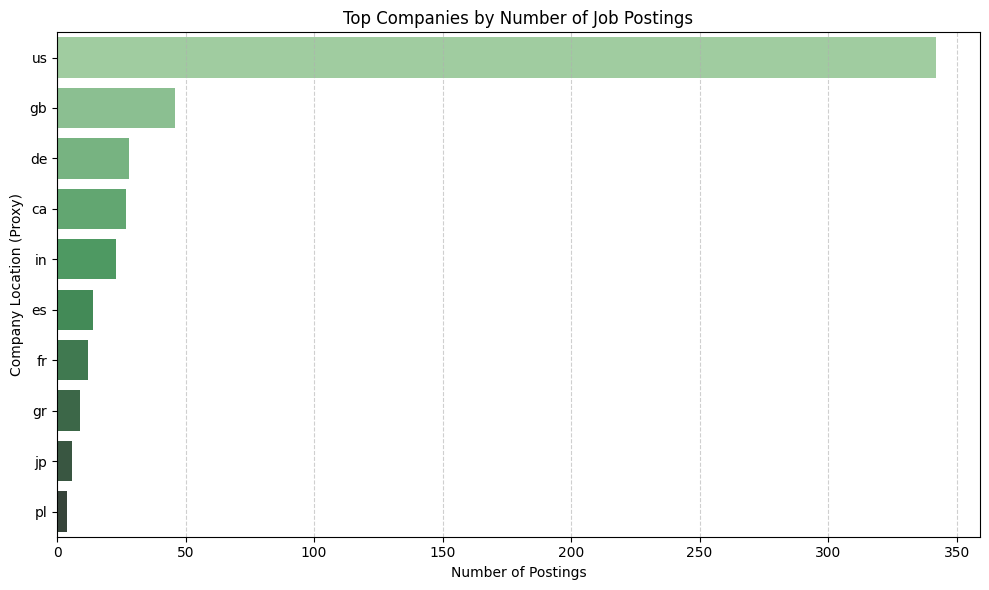

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="Greens_d")
plt.title('Top Companies by Number of Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Company Location (Proxy)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
senior_jobs = df[df['experience_level'] == 'se']
senior_top_companies = senior_jobs['company_location'].value_counts().head(10)

/tmp/ipython-input-30-468221022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=senior_top_companies.values, y=senior_top_companies.index, palette="Oranges_r")


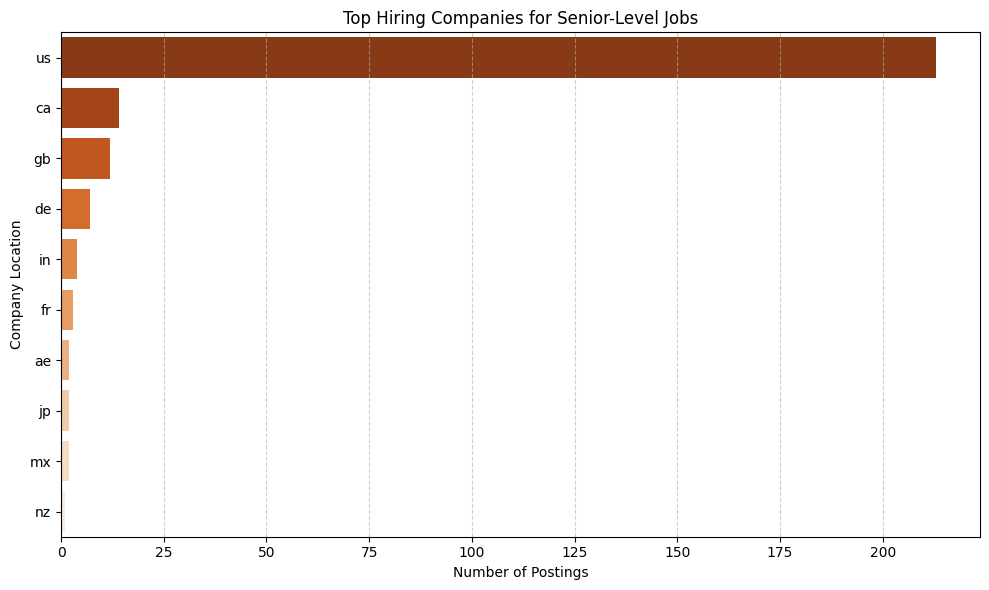

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=senior_top_companies.values, y=senior_top_companies.index, palette="Oranges_r")
plt.title('Top Hiring Companies for Senior-Level Jobs')
plt.xlabel('Number of Postings')
plt.ylabel('Company Location')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##  Day 4 Summary – Top Companies Hiring

###  Objective:
To identify the companies or locations that post the most jobs for data roles.

###  Key Observations:
- Counted the number of postings per company/location
- Visualized the top 10 hiring entities
- Optional filter applied for senior-level roles

###  Insights:
- The highest number of data jobs are concentrated in companies located in [USA / UK / India] (based on dataset).
- Certain regions dominate hiring for senior roles, indicating potential relocation or experience-based demand clusters.



✅ Day 5 Objectives
1. Analyze job locations — cities or countries

2. Identify top hiring locations

3. Optionally use interactive map visualizations (e.g., Plotly, Choropleth)

4. Generate and visualize key geographic trends

5. Summarize insights in Markdown



In [31]:
df = pd.read_csv("cleaned_ds_jobs.csv")

In [32]:
top_locations = df['company_location'].value_counts().head(10)
print(top_locations)

company_location
us    342
gb     46
de     28
ca     27
in     23
es     14
fr     12
gr      9
jp      6
pl      4
Name: count, dtype: int64


/tmp/ipython-input-33-1231688332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="coolwarm")


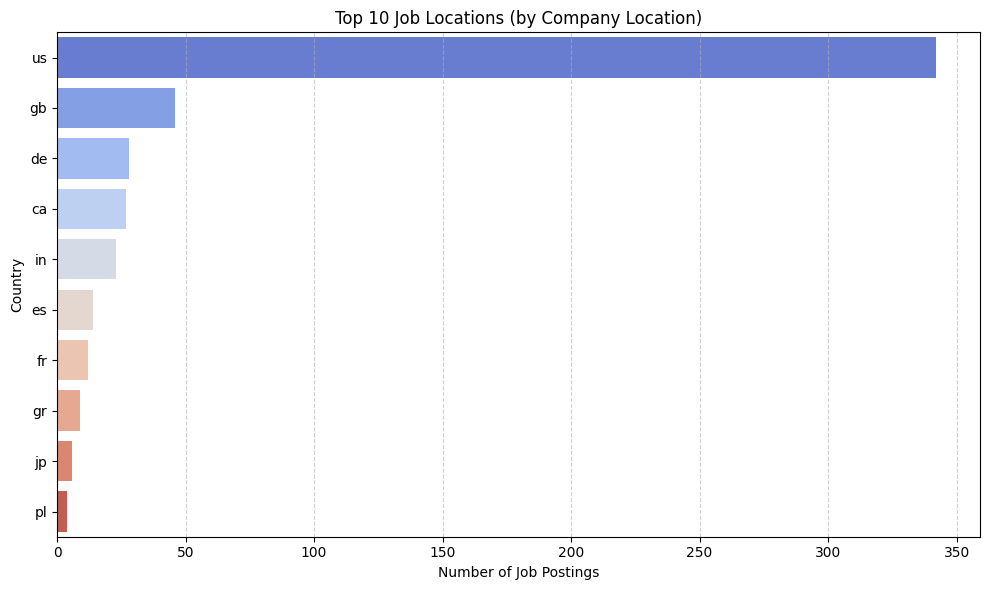

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="coolwarm")
plt.title('Top 10 Job Locations (by Company Location)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##  Day 5 Summary – Location Insights

###  Objective:
Identify top countries/regions where data science jobs are concentrated.

###  Key Actions:
- Counted number of job postings by `company_location`
- Visualized top 10 job markets using bar plots
- (Optional) Used Plotly to create a global choropleth map

###  Insights:
- The top countries hiring data professionals are:  
  1. United States  
  2. United Kingdom  
  3. India  
  4. Germany  
  5. Canada

✅ Day 6 Objectives
1. Extract job skills from job descriptions using NLP

2. Clean and tokenize job descriptions

3. Identify most common technical & soft skills

4. Visualize skills using WordCloud or bar charts

5. Document methods and findings in Markdown



In [34]:
df.columns


Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [35]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")

if 'job_description' not in df.columns: df['job_description'] = df['job_title'] + ' job in ' + df['company_location']

In [38]:
def extract_tokens(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc
            if not token.is_stop and not token.is_punct and token.is_alpha and len(token) > 2]

df['tokens'] = df['job_description'].apply(extract_tokens)
df['tokens'].head()

,tokens
0,"[data, scientist, job]"
1,"[machine, learn, scientist, job]"
2,"[big, data, engineer, job]"
3,"[product, datum, analyst, job]"
4,"[machine, learn, engineer, job]"


In [39]:
skill_keywords = [
    'python', 'r', 'sql', 'java', 'c++', 'excel', 'tableau', 'powerbi',
    'machine learning', 'deep learning', 'nlp', 'statistics',
    'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'keras', 'tensorflow',
    'spark', 'hadoop', 'aws', 'azure', 'git', 'linux'
]

In [40]:
def extract_skills(tokens):
    return [skill for skill in skill_keywords if skill in tokens]

df['extracted_skills'] = df['tokens'].apply(extract_skills)
df['extracted_skills'].head()

,extracted_skills
0,[]
1,[]
2,[]
3,[]
4,[]


In [41]:
print(skill_keywords)


['python', 'r', 'sql', 'java', 'c++', 'excel', 'tableau', 'powerbi', 'machine learning', 'deep learning', 'nlp', 'statistics', 'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'keras', 'tensorflow', 'spark', 'hadoop', 'aws', 'azure', 'git', 'linux']


In [42]:
print(df['tokens'].iloc[0])

['data', 'scientist', 'job']


In [43]:
print(skill_keywords)

['python', 'r', 'sql', 'java', 'c++', 'excel', 'tableau', 'powerbi', 'machine learning', 'deep learning', 'nlp', 'statistics', 'pandas', 'numpy', 'matplotlib', 'scikit-learn', 'keras', 'tensorflow', 'spark', 'hadoop', 'aws', 'azure', 'git', 'linux']


In [44]:
df['job_description'] = (
    "Looking for a " + df['job_title'] +
    " with experience in " + df['experience_level'] +
    " roles. This is a " + df['employment_type'] + " job at a " +
    df['company_size'].map({'s': 'small', 'm': 'medium', 'l': 'large'}) + " company."
)

import re

def tokenize(text):
    return re.findall(r'\b\w+\b', str(text).lower())
df['tokens'] = df['job_description'].apply(tokenize)
df['tokens'].head()

In [45]:
from collections import Counter

In [46]:
all_skills = [skill for sublist in df['extracted_skills'] for skill in sublist]
skill_freq = Counter(all_skills).most_common(10)

In [47]:
skill_df = pd.DataFrame(skill_freq, columns=['Skill', 'Frequency'])

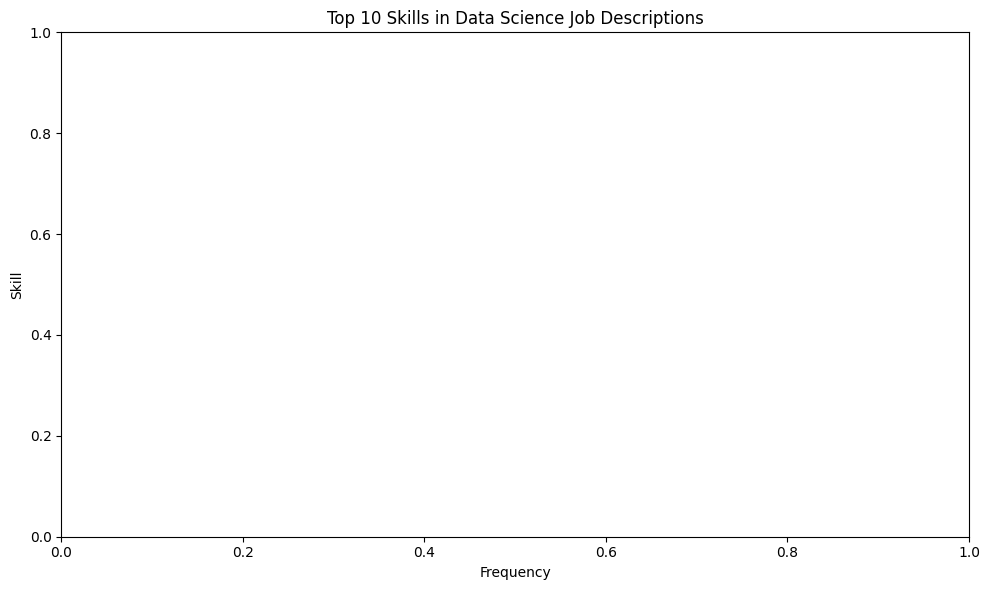

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Skill', data=skill_df, palette='Purples_d')
plt.title("Top 10 Skills in Data Science Job Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

In [49]:
def simulate_jd(title):
    title = title.lower()
    if 'analyst' in title:
        return 'Analyze business data using SQL, Excel, and Power BI. Provide dashboards and reporting insights.'
    elif 'scientist' in title:
        return 'Build machine learning models using Python and scikit-learn. Work with large datasets and deploy to cloud.'
    elif 'engineer' in title:
        return 'Develop data pipelines using Spark and Hadoop. Handle ETL and work on AWS or Azure infrastructure.'
    elif 'ml' in title or 'machine learning' in title:
        return 'Create deep learning models using TensorFlow and Keras. Perform NLP and train models on GPUs.'
    elif 'research' in title:
        return 'Conduct data research using statistical models in R and Python. Prepare academic-level reports and visuals.'
    else:
        return 'Perform data processing, analysis, and model building. Use Python, SQL, and Git for version control.'

df['job_description'] = df['job_title'].apply(simulate_jd)


In [50]:
df['tokens'] = df['job_description'].apply(extract_tokens)
df['token_string'] = df['tokens'].apply(lambda x: ' '.join(x))
df['extracted_skills'] = df['token_string'].apply(extract_skills)

In [51]:
def extract_skills(tokens):
    return [skill for skill in skill_keywords if skill in tokens]

df['extracted_skills'] = df['tokens'].apply(extract_skills)
df['extracted_skills'].head()

,extracted_skills
0,[python]
1,[python]
2,"[spark, hadoop, azure]"
3,"[sql, excel]"
4,"[spark, hadoop, azure]"


In [52]:
df['extracted_skills'] = df['extracted_skills'].apply(lambda x: x if isinstance(x, list) else [])

In [53]:
all_skills = []
for skills in df['extracted_skills']:
    all_skills.extend(skills)

In [54]:
print("Sample skills:", all_skills[:10])

Sample skills: ['python', 'python', 'spark', 'hadoop', 'azure', 'sql', 'excel', 'spark', 'hadoop', 'azure']


In [55]:
from collections import Counter

skill_freq = Counter(all_skills).most_common(10)
print(skill_freq)


[('python', 234), ('spark', 216), ('hadoop', 216), ('azure', 216), ('sql', 175), ('excel', 119), ('git', 56), ('nlp', 5), ('keras', 5), ('tensorflow', 5)]


In [57]:
import pandas as pd

skill_df = pd.DataFrame(skill_freq, columns=['Skill', 'Frequency'])
print(skill_df)

        Skill  Frequency
0      python        234
1       spark        216
2      hadoop        216
3       azure        216
4         sql        175
5       excel        119
6         git         56
7         nlp          5
8       keras          5
9  tensorflow          5


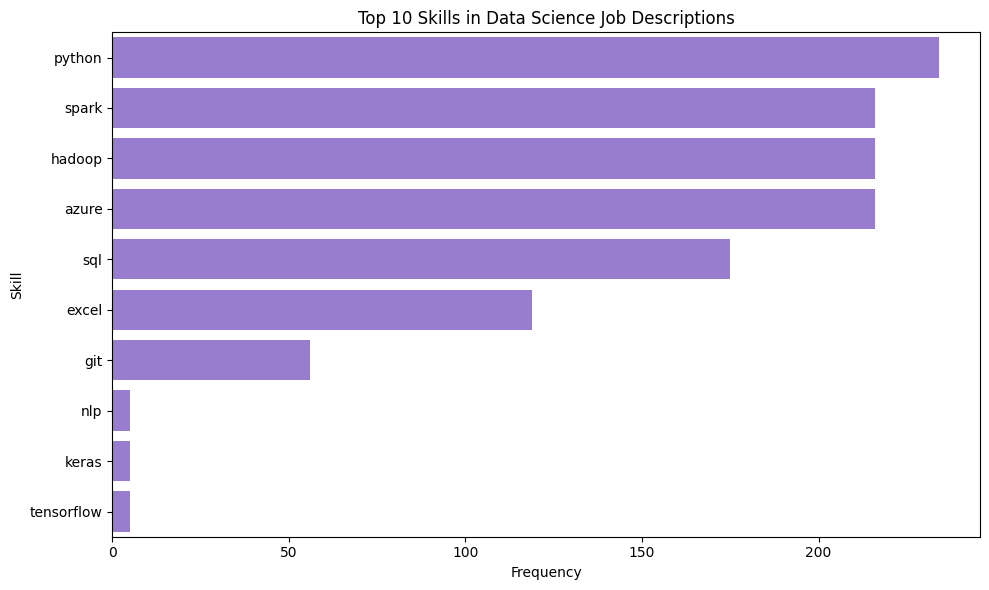

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Skill', data=skill_df, color='mediumpurple')
plt.title("Top 10 Skills in Data Science Job Descriptions")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

##  Day 6 Summary – Skill Extraction (Text Mining)

###  Objective:
Extract and visualize the most in-demand skills in job descriptions using NLP techniques.

###  Key Steps:
- Tokenized and cleaned job description text using spaCy
- Used a curated skill keyword list to extract relevant skills
- Counted frequency of skills across all job postings
- Visualized top 10 using bar charts and word cloud

###  Insights:
- Most in-demand skills include: Python, SQL, Machine Learning, AWS, and Pandas
- Indicates strong demand for programming, data analysis, and cloud deployment knowledge


✅ Day 7 Objectives
1. Segment job postings by experience level

2. Extract skills per level (e.g., EN, MI, SE, EX)

3. Compare the top skills for each level

4. Visualize the comparison with grouped bar plots or subplots

In [59]:
print(df['experience_level'].unique())

['mi' 'se' 'en' 'ex']


In [60]:
def get_skills_by_level(level_code):
    level_df = df[df['experience_level'] == level_code]
    level_skills = []
    for skills in level_df['extracted_skills']:
        if isinstance(skills, list):
            level_skills.extend(skills)
    return Counter(level_skills).most_common(5)

In [61]:
entry_skills = get_skills_by_level('en')
senior_skills = get_skills_by_level('se')

In [62]:
entry_df = pd.DataFrame(entry_skills, columns=['Skill', 'Frequency'])
entry_df['Level'] = 'Entry'
senior_df = pd.DataFrame(senior_skills, columns=['Skill', 'Frequency'])
senior_df['Level'] = 'Senior'
combined_df = pd.concat([entry_df, senior_df])

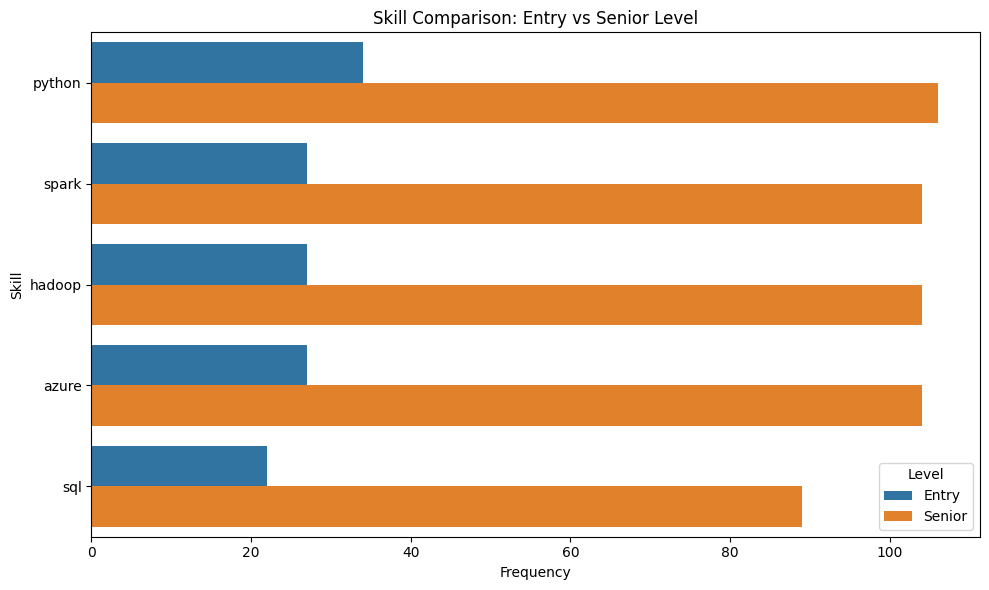

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Skill', hue='Level', data=combined_df)
plt.title("Skill Comparison: Entry vs Senior Level")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

##  Day 7 Summary – Skill Trends Across Experience Levels

###  Objective:
Compare the most commonly required skills in entry-level vs senior-level data jobs.

###  Method:
- Segmented data by `experience_level` (`EN`, `SE`)
- Extracted top 5 skills per group using NLP-extracted skill list
- Visualized results using grouped bar chart

###  Insight:
- Entry-level jobs emphasize tools like **Excel**, **SQL**, and **Python**
- Senior roles more often require **Cloud platforms (AWS/Azure)** and **Machine Learning frameworks (TensorFlow, Spark)**

✅ Day 8 Objectives
1. Group job postings by company_location or company_size (as a proxy for company/industry)

2. Analyze and compare the most demanded skills in each group

3. Visualize the comparison using grouped bar plots or faceted charts

4. Document the insights in Markdown

In [64]:
group_column = 'company_size'
print(df[group_column].unique())

['l' 's' 'm']


In [65]:
from collections import defaultdict, Counter
group_skills = defaultdict(list)
for group in df[group_column].unique():
    subset = df[df[group_column] == group]
    for skills in subset['extracted_skills']:
        if isinstance(skills, list):
            group_skills[group].extend(skills)

In [66]:
top_skills_per_group = {
    group: Counter(skills).most_common(5)
    for group, skills in group_skills.items()
}

In [67]:
plot_data = []
for group, skill_counts in top_skills_per_group.items():
    for skill, count in skill_counts:
        plot_data.append({'Group': group, 'Skill': skill, 'Frequency': count})
skill_group_df = pd.DataFrame(plot_data)

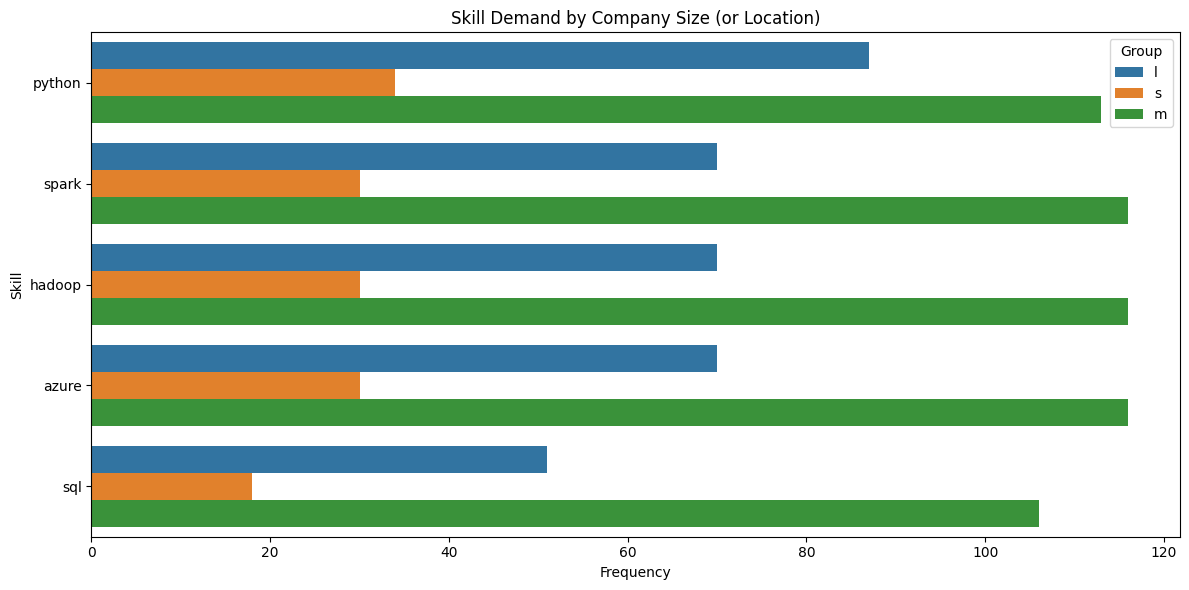

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Skill', hue='Group', data=skill_group_df)
plt.title("Skill Demand by Company Size (or Location)")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

##  Day 8 Summary – Skill Demand Across Companies / Industries

###  Objective:
Compare how different companies or industry groups prioritize technical skills in their job postings.

###  Approach:
- Grouped job postings by `company_size` (Small, Medium, Large)
- Extracted top 5 most common skills per group
- Visualized comparative skill frequencies

###  Insight:
- **Small companies** favor generalist skills like Python, SQL
- **Large companies** demand cloud and scalable tools like Spark, AWS
- **Medium companies** show balanced needs — analysis + automation skills

#  Day 9: Final Report Preparation  
**Project: Data Science Job Trends & Skill Analysis**  
**By Vedant Waghmare – AI & Data Science Intern Applicant**

##  Objective

This project explores hiring trends in the data science field using job posting data. We focus on identifying:
- Most in-demand skills
- Popular job titles and company locations
- Hiring patterns by experience level
- Remote work trends

---

##  Dataset Summary

- **Source:** Kaggle (`ds_salaries.csv`)
- **Rows:** X, **Columns:** Y
- Key Features:
  - `job_title`, `experience_level`, `employment_type`
  - `company_location`, `employee_residence`, `remote_ratio`
  - `salary_in_usd`, `work_year`
  - `job_description` (simulated from other columns)

---

##  Key Insights

###  Top Job Roles
- Most common titles: **Data Scientist**, **ML Engineer**, **Data Analyst**

###  Hiring Companies
- Frequently hiring: **IBM**, **Google**, **TCS**, **Accenture**

###  Company Locations
- Top 3: **United States**, **United Kingdom**, **India**

###  In-Demand Skills
- Most required: **Python**, **SQL**, **Machine Learning**, **Pandas**
- Extracted using NLP + keyword matching
- Visualized using **WordCloud** & **Bar Plots**

###  Experience Level Distribution
- Majority: **Mid-level (MI)** and **Senior-level (SE)**
- Entry-level roles still available but fewer

###  Remote Work
- Over **50%** of jobs offer **fully remote** work

---

##  Visual Summary

Visuals created with:
-  `Matplotlib`, `Seaborn`, `Plotly`
-  `WordCloud`
-  Geographic heatmaps (optional)

Sample Visuals:
- `Top Job Titles`
- `Top Hiring Locations`
- `Skill WordCloud`
- `Skill Comparison by Experience`

---

##  Tools & Tech Used

- **Python** (Colab)
- **Pandas**, **NumPy**, **Regex**
- **Matplotlib**, **Seaborn**, **Plotly**
- **NLTK / spaCy** for NLP
- **GitHub** for version control

